In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [16]:
def plot_reg_cv_results(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    K = int(data[0,2])
    lambdas = data[:, 0:2]
    ticks = []
    for lu, lv in lambdas:
        if lu > 0.2:
            lu = int(lu)
        if lv > 0.2:
            lv = int(lv)
        ticks.append(f'({lu}, {lv})')
    valid_rmse = data[:, 3]
    train_rmse = data[:, 4]

    x = range(len(valid_rmse))
    line1, = plt.plot(x, valid_rmse, 'o-', label='Validation RMSE')
    line2, = plt.plot(x, train_rmse, 'o-', label='Training RMSE')
    plt.legend(handles=[line1, line2])
    plt.xticks(x, ticks, rotation='vertical')
    plt.xlabel('($\lambda_u, \lambda_v$)')
    plt.title(f'Cross validation results for dense dataset with K={K}')
    plt.savefig(filename.replace(r'.csv', '.eps'), bbox_inches='tight')
    plt.show()

In [33]:
def plot_K_cv_results(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    lambda_u, lambda_v = data[0, 0:2]
    K = data[:, 2]
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    valid_rmse = data[:, 3]
    train_rmse = data[:, 4]
    line1, = plt.plot(K, valid_rmse, 'o-', label='Validation RMSE')
    line2, = plt.plot(K, train_rmse, 'o-', label='Training RMSE')
    plt.legend(handles=[line1, line2])
    plt.xlabel('K (No. of latent factors)')
    plt.title(f'Cross validation results for dense dataset with $\lambda_u$={lambda_u} and $\lambda_v$={lambda_v}')
    plt.savefig(filename.replace(r'.csv', '.eps'), bbox_inches='tight')
    plt.show()

In [34]:
def plot_cv_results(dataset_type):
    plot_reg_cv_results(f'proj3/cv_results_reg_{dataset_type}.csv')
    plot_K_cv_results(f'proj3/cv_results_K_{dataset_type}.csv')

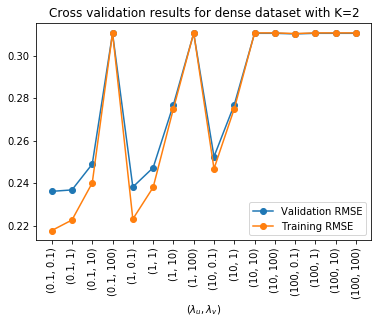

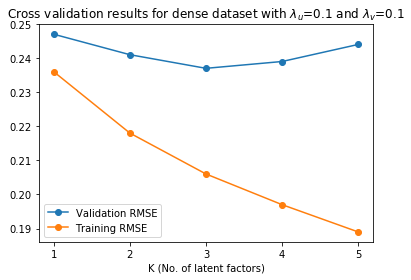

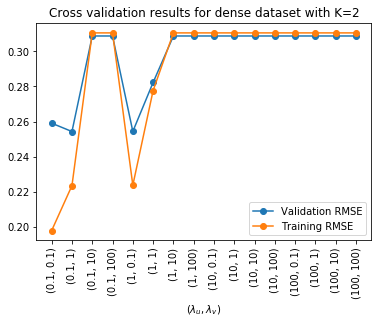

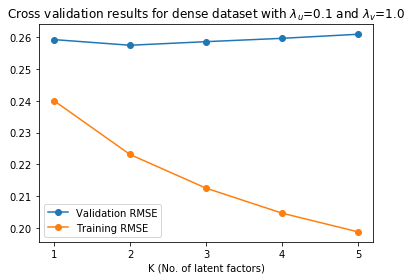

In [37]:
for dataset_type in ['dense', 'sparse']:
    plot_cv_results(dataset_type)